In [2]:
import cv2
import numpy as np
import pymupdf
import torch
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image

In [3]:
torch.cuda.is_available()

True

In [14]:
ocr = PaddleOCR(
    cls_model_dir="../models/ch_ppocr_mobile_v2.0_cls_infer/",
    det_model_dir="../models/en_PP-OCRv3_det_infer/",
    rec_model_dir="../models/en_PP-OCRv3_rec_infer/",
    # cls_model_dir="../models/ch_ppocr_mobile_v2.0_cls_infer",
    # det_model_dir="../models/ch_PP-OCRv3_det_slim_infer",
    # rec_model_dir="../models/ch_PP-OCRv3_rec_slim_infer",
    use_angle_cls=False,
    use_gpu=True if torch.cuda.is_available() else False,
    use_onnx=False,
    lang="fr",
)

[2025/01/02 23:49:32] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='../models/en_PP-OCRv3_det_infer/', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='../models/en_PP-OCRv3_rec_infer/', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/home/gabriel/proje

In [15]:
pdf_path = "../data/test_pdf.pdf"
pdf = pymupdf.open(pdf_path)
for page in pdf:
    print(pdf)
    mat = pymupdf.Matrix(2, 2)
    pix = page.get_pixmap(matrix=mat, alpha=False)

    # Convert the pixmap to a Pillow image
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    break


Document('../data/test_pdf.pdf')


In [16]:
img_np = np.array(img)
result = ocr.ocr(img_np, cls=False)

[2025/01/02 23:49:53] ppocr DEBUG: dt_boxes num : 60, elapsed : 2.5460128784179688
[2025/01/02 23:50:45] ppocr DEBUG: rec_res num  : 60, elapsed : 52.42926907539368


In [17]:
result

[[[[[248.0, 144.0], [975.0, 145.0], [975.0, 168.0], [248.0, 167.0]],
   ('@dahYTUT«bdabUd«QffdYRgfYa`«Ye«bdahYTUT}«7aaW]U«XUdURk«WdQ`fe«bUd_YeeYa`«fa',
    0.9928878545761108)],
  [[[246.0, 175.0], [976.0, 175.0], [976.0, 196.0], [246.0, 196.0]],
   ('dUbdaTgSU«fXU«fQR]Ue«Q`T«VYWgdUe«Y`«fXYe«bQbUd«ea]U]k«Vad«geU«Y`«Zagd`Q]YefYS«ad',
    0.9928966760635376)],
  [[[534.0, 203.0], [692.0, 203.0], [692.0, 224.0], [534.0, 224.0]],
   ('eSXa]Qd]k«iad[e£', 0.999877393245697)],
  [[[424.0, 299.0], [798.0, 299.0], [798.0, 327.0], [424.0, 327.0]],
   ('1ffU`fYa`«9e«1]]«Iag«>UUT', 0.971722424030304)],
  [[[30.0, 424.0], [72.0, 424.0], [72.0, 525.0], [30.0, 525.0]],
   ('5J J', 0.6220338344573975)],
  [[[263.0, 465.0], [408.0, 467.0], [407.0, 490.0], [263.0, 488.0]],
   ('1eXYeX«FQeiQ`Yz', 0.9997925162315369)],
  [[[476.0, 467.0], [609.0, 467.0], [609.0, 490.0], [476.0, 490.0]],
   ('>aQ_«CXQlUUdz', 0.9996871948242188)],
  [[[675.0, 465.0], [793.0, 465.0], [793.0, 488.0], [675.0, 488.0]],
   ('>Y[

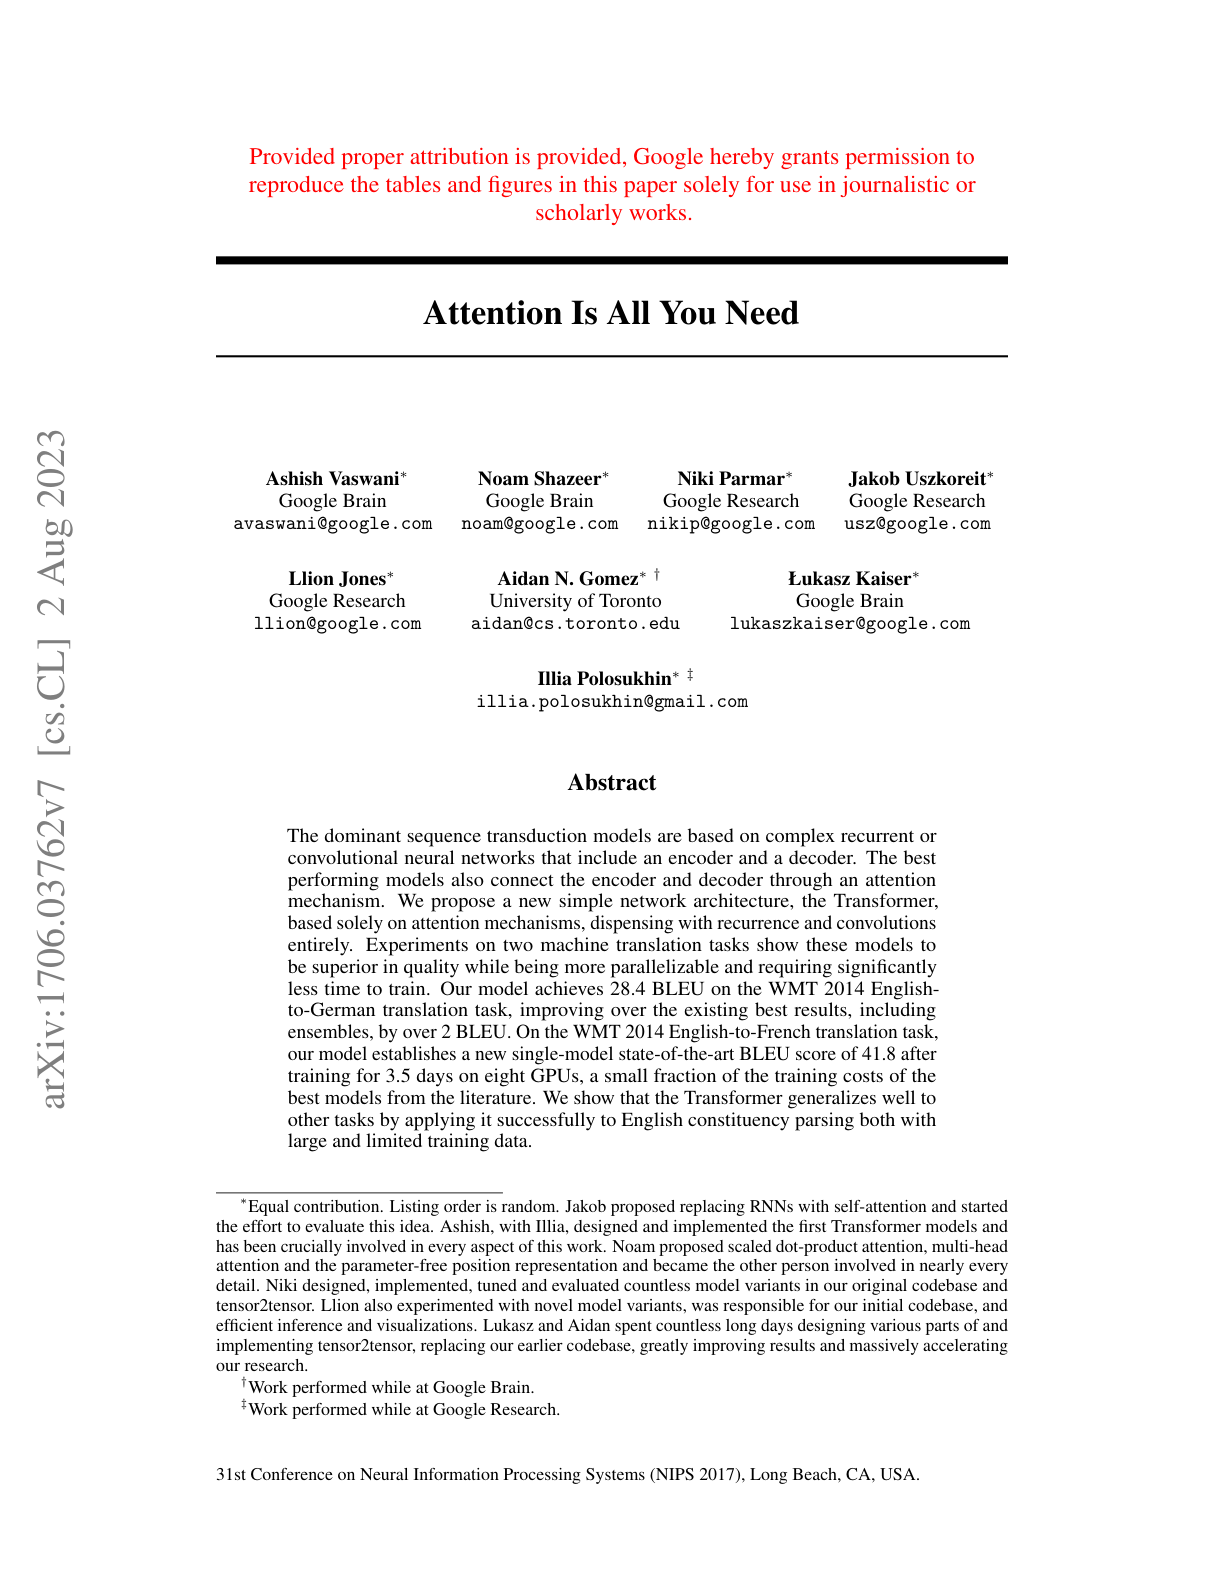

In [8]:
img